In [1]:
import random

In [6]:
def main(data,k):
  centroids = initialize_centroids(data,k)
  labels = []
  while True:
    old_centroids = centroids
    labels = get_label(data,centroids)
    centroids = update_centroids(data,labels,k)

    if should_stop(old_centroids,centroids):
      break
  return labels

In [7]:
def random_sample(low,high):
  return low + (high - low) * random.random()

def initialize_centroids(data,k):
  xmin = ymin = float('inf')
  xmax = ymax = float('-inf')

  for point in data:
    xmin = min(point[0],xmin)
    xmax = max(point[0],xmax)
    ymin = min(point[1],ymin)
    ymax = max(point[1],ymax)
  centroids = []
  for i in range(k):
    centroids.append([random_sample(xmin,xmax),random_sample(ymin,ymax)])

  return centroids


def get_label(data,centroids):
  labels = []
  for point in data:
    min_distance = float('inf')
    label = None
    for i, centroid in enumerate(centroids):
      new_distance = get_distance(point,centroid)
      if new_distance < min_distance:
        min_distance = new_distance
        label = i
    labels.append(label)
  return labels

def get_distance(point1,point2):
  return ((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)**0.5

def update_centroids(points,labels,k):
  new_centroids = [[0,0] for i in range(k)]
  counts = [0]*k

  for point,label in zip(points,labels):
    new_centroids[label][0] += point[0]
    new_centroids[label][1] += point[1]
    counts[label] += 1

  for i,(x,y) in enumerate(new_centroids):
    new_centroids[i] = (x/counts[i],y/counts[i])


  return new_centroids


def should_stop(old_centroids,new_centroids,threshold=1e-5):
  total_movement = 0
  for old_point,new_point in zip(old_centroids,new_centroids):
    total_movement += get_distance(old_point,new_point)

  return total_movement < threshold




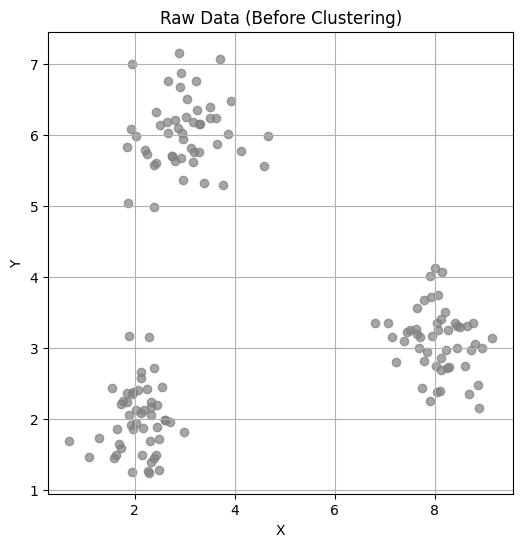

In [11]:
import matplotlib.pyplot as plt
import random

def generate_data():
    random.seed(42)
    data = []
    for _ in range(50):
        data.append([random.gauss(2, 0.5), random.gauss(2, 0.5)])
    for _ in range(50):
        data.append([random.gauss(8, 0.5), random.gauss(3, 0.5)])
    for _ in range(50):
        data.append([random.gauss(3, 0.5), random.gauss(6, 0.5)])
    return data

data = generate_data()

plt.figure(figsize=(6,6))
plt.scatter([x[0] for x in data], [x[1] for x in data], color='gray', alpha=0.7)
plt.title("Raw Data (Before Clustering)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


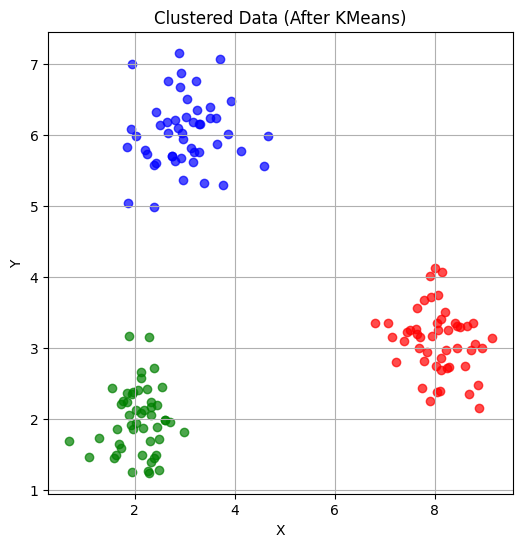

In [12]:
labels = main(data, k=3)


colors = ['red', 'blue', 'green']
plt.figure(figsize=(6,6))

for point, label in zip(data, labels):
    plt.scatter(point[0], point[1], color=colors[label], alpha=0.7)

plt.title("Clustered Data (After KMeans)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()
